Mean Absolute Error: 0.2948356875064906


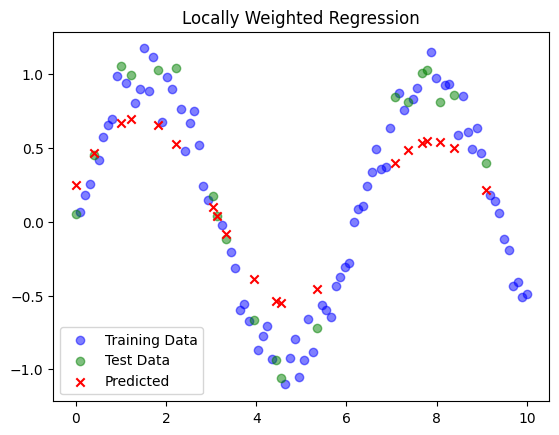

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

def gaussian_kernel(distance, tau):
    return np.exp(-distance**2 / (2 * tau**2))

def locally_weighted_regression(X_train, y_train, x_query, tau):
    weights = np.array([gaussian_kernel(np.linalg.norm(x_query - x), tau) for x in X_train])
    W = np.diag(weights)
    X_b = np.c_[np.ones(X_train.shape[0]), X_train]
    theta = np.linalg.inv(X_b.T @ W @ X_b) @ X_b.T @ W @ y_train
    return np.dot([1, *x_query], theta)

X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tau = 1.0

y_pred = np.array([locally_weighted_regression(X_train, y_train, x, tau) for x in X_test])

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

plt.scatter(X_train, y_train, color='blue', alpha=0.5)
plt.scatter(X_test, y_test, color='green', alpha=0.5)
plt.scatter(X_test, y_pred, color='red', marker='x')
plt.title("Locally Weighted Regression")
plt.legend(["Training Data", "Test Data", "Predicted"])
plt.show()
